In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Load data

In [3]:
df = pd.read_csv('data_final.csv', sep=';')
data_dict = pd.read_excel("Dictionnaire_final.xlsx")

<Axes: >

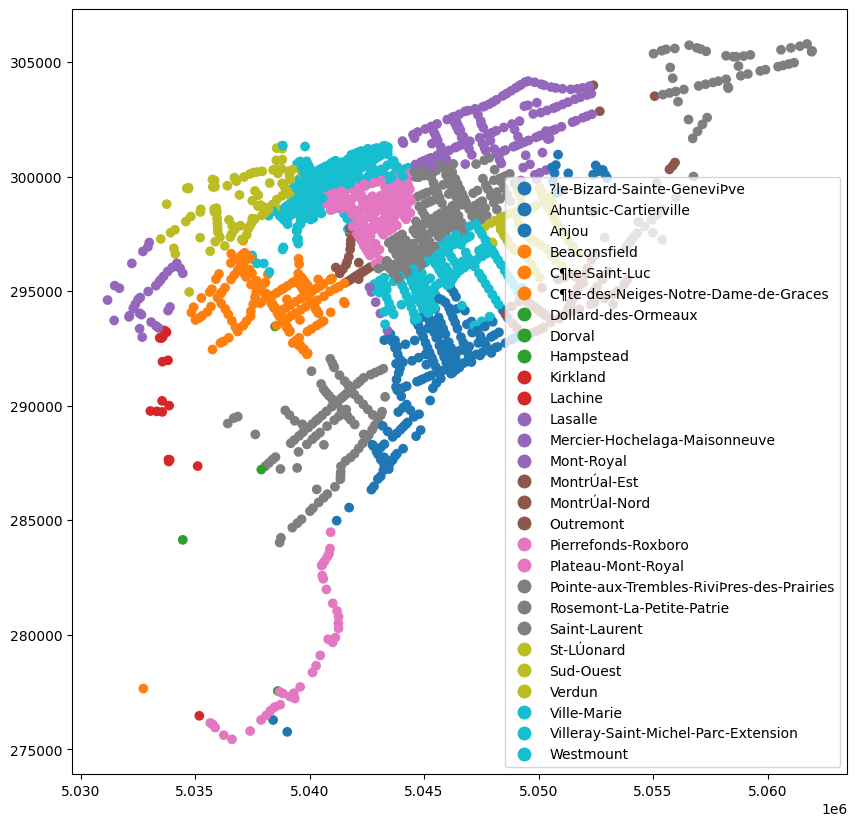

In [4]:
import geopandas as gpd
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.y, df.x))
gdf.plot(column="borough", legend=True, figsize=(10, 10))

In [5]:
# Display all columns
pd.set_option('display.max_colwidth', None)
data_dict

,NOM,DESCRIPTION
0,int_no,Intersection ID
1,x,latitude
2,y,longitude
3,rue_1,first street of the intersection
4,rue_2,second street of the intersection
5,street_1,first street of the intersection
6,street_2,second street of the intersection
7,date,date where safety measures where recorded
8,all_pedest,presence of all pedestrian phase (exclusive pedestrian phase)
9,pi,average annual daily flow for pedestrian at the intersection


# Drop superfluous columns

In [6]:
# Drop superfluous columns
df = df.drop(columns=["Unnamed: 59", "Unnamed: 60"])
# Drop descriptive columns
df = df.drop(columns=["street_1", "street_2", "date_", "x", "y"])

# Drop columns that are transformations of other columns
# log_columns = [c for c in df.columns if c.startswith("ln_")]
# divided_columns = ["traffic_10000", "ped_100"]
# df = df.drop(columns=log_columns + divided_columns)

In [7]:
# Duplicates?
print(df["int_no"].value_counts().sort_values().tail(5))
df[df["int_no"] == 9151]

int_no
128     1
47      1
539     1
931     1
9151    2
Name: count, dtype: int64


,int_no,rue_1,rue_2,all_pedest,pi,fi,fli,fri,fti,cli,cri,cti,acc,ln_pi,ln_fi,ln_fli,ln_fri,ln_fti,ln_cli,ln_cri,ln_cti,tot_crossw,number_of_,avg_crossw,tot_road_w,median,green_stra,half_phase,any_ped_pr,ped_countd,lt_protect,lt_restric,lt_prot_re,parking,north_veh,north_ped,east_veh,east_ped,south_veh,south_ped,west_veh,west_ped,total_lane,of_exclusi,any_exclus,commercial,curb_exten,all_red_an,new_half_r,distdt,ln_distdt,traffic_10000,ped_100,borough
731,9151,Langelier,P,0,894.321106,21885.785156,1797.271240,1911.182861,18177.332031,367918.562500,358592.75,5179895.0,0,6.796065,9.993593,7.494025,7.555478,9.807931,12.815617,12.789943,15.460295,70.500000,4,17.6,62.400002,1,0,0,0,0,0,0,0,0.0,9022.216797,103.190895,1742.424927,193.709229,10397.59375,173.795197,723.549316,423.625793,4,0,0,7,0,0,0,10801.348633,9.287426,2.188579,8.943211,St-LÚonard
756,9151,Jean-Talon,Mainville,0,1124.394653,12923.561523,590.416504,740.914795,11592.229492,193910.265625,330928.50,6889527.5,1,7.025000,9.466807,6.380828,6.607886,9.358090,12.175151,12.709658,15.745513,53.700001,4,13.4,37.400002,0,0,0,0,0,0,0,0,0.5,764.068420,530.071777,6766.636230,223.094177,0.00000,0.000000,5392.856445,371.228729,4,0,0,0,0,0,0,9239.489258,9.131242,1.292356,11.243946,St-LÚonard


# Drop invalid entries

- Notre mandat est de classer les intersections selon leur niveau de sécurité.
- Le compte des accidents par intersection qui nous a été fournis concerne seulement les accidents impliquant des piétons.
- On ne pourra donc tirer de conclusions qu'en terme de sécurité **pour les piétons**.

In [8]:
df[df["pi"] == 0]

,int_no,rue_1,rue_2,all_pedest,pi,fi,fli,fri,fti,cli,cri,cti,acc,ln_pi,ln_fi,ln_fli,ln_fri,ln_fti,ln_cli,ln_cri,ln_cti,tot_crossw,number_of_,avg_crossw,tot_road_w,median,green_stra,half_phase,any_ped_pr,ped_countd,lt_protect,lt_restric,lt_prot_re,parking,north_veh,north_ped,east_veh,east_ped,south_veh,south_ped,west_veh,west_ped,total_lane,of_exclusi,any_exclus,commercial,curb_exten,all_red_an,new_half_r,distdt,ln_distdt,traffic_10000,ped_100,borough
0,40,Côte-Saint-Antoine,Hampton/Sherbrooke,0,0.0,2603.827881,0.000000,0.000000,2603.827881,0.0,0.0,0.0,0,0.0,7.864738,0.000000,0.000000,7.864738,0.0,0.0,0.0,77.400002,4,19.400000,53.700001,1,0,1,1,1,1,1,1,1.0,0.000000,0.0,2603.827881,0.0,0.000000,0.0,0.000000,0.0,5,0,0,0,0,0,1,3932.076904,8.276923,0.260383,0.0,C¶te-des-Neiges-Notre-Dame-de-Graces
1,263,Centre,Wellington,0,0.0,7816.051758,1251.560547,777.997070,5786.494141,0.0,0.0,0.0,0,0.0,8.963935,7.132146,6.656723,8.663282,0.0,0.0,0.0,51.900002,3,17.299999,40.400002,0,0,1,1,1,0,1,1,0.0,1251.560547,0.0,2595.578613,0.0,112.753204,0.0,3856.159424,0.0,4,0,0,1,0,0,1,2097.060059,7.648292,0.781605,0.0,Sud-Ouest
2,1107,Pierre-Dupuy,Habitats 67,0,0.0,8896.671875,282.226379,54.202415,8560.243164,0.0,0.0,0.0,0,0.0,9.093433,5.642709,3.992725,9.054884,0.0,0.0,0.0,27.000000,2,13.500000,27.500000,0,0,0,0,0,1,1,1,0.0,0.000000,0.0,3762.395264,0.0,336.428772,0.0,4797.848145,0.0,4,0,0,2,1,0,0,2112.164062,7.655468,0.889667,0.0,Ville-Marie
3,1364,Charlevoix,Wellington,0,0.0,10932.754883,1303.225952,1884.360840,7745.167969,0.0,0.0,0.0,0,0.0,9.299519,7.172598,7.541344,8.954824,0.0,0.0,0.0,48.200001,4,12.000000,31.000000,0,0,0,0,0,0,0,0,0.0,1449.127930,0.0,4785.089355,0.0,182.995667,0.0,4515.541992,0.0,2,0,0,0,0,0,0,3172.770020,8.062361,1.093276,0.0,Sud-Ouest
4,225,Courcelle,Notre-Dame,0,0.0,10479.296875,1227.449951,1450.413696,7801.432617,0.0,0.0,0.0,0,0.0,9.257157,7.112694,7.279604,8.962063,0.0,0.0,0.0,57.099998,4,14.300000,44.900002,0,0,0,0,0,0,0,0,1.0,1758.425537,0.0,4650.058594,0.0,1284.914795,0.0,2785.897705,0.0,2,0,0,0,0,0,0,3525.406006,8.167751,1.047930,0.0,Sud-Ouest
5,1728,Egan,LaSalle,0,0.0,14704.115234,2974.382568,3367.442383,8362.290039,0.0,0.0,0.0,0,0.0,9.595883,7.997792,8.121909,9.031488,0.0,0.0,0.0,32.299999,4,8.100000,30.000000,0,0,0,0,0,0,1,1,0.0,3461.684814,0.0,4463.872070,0.0,3624.885010,0.0,3153.672852,0.0,1,0,0,0,0,0,0,5590.807129,8.628879,1.470412,0.0,Verdun
6,1623,Boucherville,Bretelle Sherbrooke (acc.BUS),0,0.0,16738.335938,1.844445,47.955566,16688.537109,0.0,0.0,0.0,0,0.0,9.725457,0.612178,3.870275,9.722477,0.0,0.0,0.0,27.700001,3,9.200000,22.900000,0,0,0,0,0,0,1,1,0.0,16705.136719,0.0,0.000000,0.0,0.000000,0.0,33.200008,0.0,2,0,0,0,0,0,0,10466.459961,9.255931,1.673834,0.0,Mercier-Hochelaga-Maisonneuve
7,978,Saint-Patrick,Wellington,0,0.0,20135.695312,1910.132812,1572.239258,16653.324219,0.0,0.0,0.0,0,0.0,9.910249,7.554928,7.360256,9.720365,0.0,0.0,0.0,50.400002,3,16.799999,42.200001,1,0,0,0,0,1,1,1,0.0,2574.426758,0.0,7392.282715,0.0,0.000000,0.0,10168.986328,0.0,2,1,1,0,0,0,0,1805.953979,7.498844,2.013570,0.0,Sud-Ouest
8,382,Duke,Wellington,0,0.0,17174.568359,5376.072754,2381.347656,9417.147461,0.0,0.0,0.0,0,0.0,9.751185,8.589713,7.775422,9.150287,0.0,0.0,0.0,68.199997,4,17.100000,55.299999,1,1,0,1,1,1,1,1,0.0,0.000000,0.0,2521.161621,0.0,9611.083008,0.0,5042.323242,0.0,4,1,1,0,0,0,0,1356.646973,7.212771,1.717457,0.0,Ville-Marie
9,944,Curatteau,Tellier,0,0.0,20766.853516,4338.240234,6737.947754,9690.666016,0.0,0.0,0.0,0,0.0,9.941113,8.375224,8.815511,9.178918,0.0,0.0,0.0,53.500000,3,17.799999,31.000000,1,0,0,0,0,1,1,1,0.0,6733.954590,0.0,0.000000,0.0,12779.141602,0.0,1253.757324,0.0,5,2,1,0,0,0,0,10487.155273,9.257907,2.076685,0.0,Mercier-Hochelaga-Maisonneuve


In [9]:
# We assume pi == 0 is a missing value, since no accidents can occur if no pedestrians are present
print(df[df["pi"] == 0].shape[0])

# We drop the rows with pi == 0, as we cannot impute the missing values
df = df[df["pi"] > 0]

25


# Standardize data types

In [10]:
# Convert columns with only 2 unique values to binary
binary_columns = [c for c in df.columns if df[c].nunique() == 2]
df[binary_columns] = df[binary_columns].astype(bool)

# Handle missing values

In [11]:
df["ln_distdt"] = df["ln_distdt"].fillna(0)

# Create new features

<Axes: >

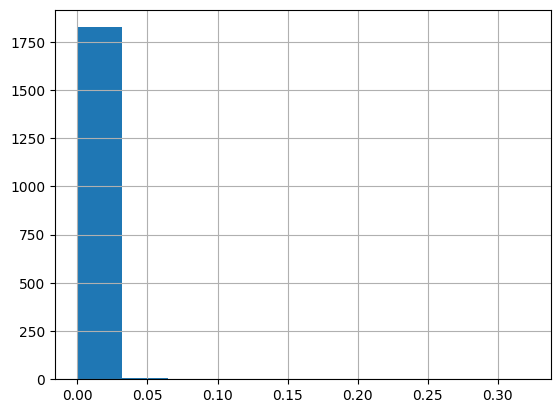

In [12]:
df["acc_rate"] =  df["acc"] / df["pi"]
df["ln_acc_rate"] = df["acc"] / np.log(df["pi"])
df["acc_rate"].hist()

<Axes: >

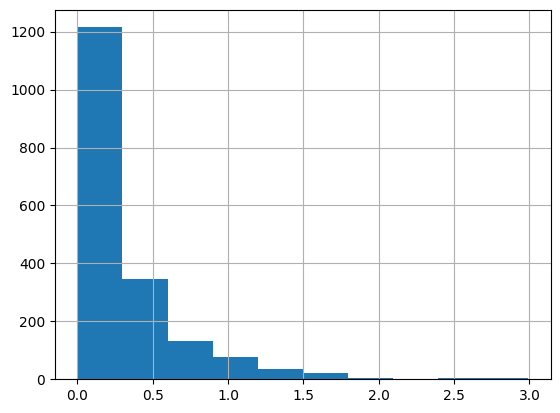

In [13]:
df["ln_acc_rate"].hist()

In [14]:
# Reorder columns so that pi, acc and acc_rate are next to each other
first_cols = ["rue_1", "rue_2", "int_no", "borough", "acc", "pi", "acc_rate", "ln_acc_rate"]
df = df[first_cols + [c for c in df.columns if c not in first_cols]]

df.sort_values("acc_rate", ascending=False).head(20)

,rue_1,rue_2,int_no,borough,acc,pi,acc_rate,ln_acc_rate,all_pedest,fi,fli,fri,fti,cli,cri,cti,ln_pi,ln_fi,ln_fli,ln_fri,ln_fti,ln_cli,ln_cri,ln_cti,tot_crossw,number_of_,avg_crossw,tot_road_w,median,green_stra,half_phase,any_ped_pr,ped_countd,lt_protect,lt_restric,lt_prot_re,parking,north_veh,north_ped,east_veh,east_ped,south_veh,south_ped,west_veh,west_ped,total_lane,of_exclusi,any_exclus,commercial,curb_exten,all_red_an,new_half_r,distdt,ln_distdt,traffic_10000,ped_100
37,Laurier,Pie-IX,860,Rosemont-La-Petite-Patrie,1,3.108282,0.321721,0.881780,False,34586.183594,586.080750,1088.082397,32912.019531,0.000000,15.373031,0.000000e+00,1.134070,10.451210,6.373458,6.992172,10.401593,0.000000,2.732615,0.000000,64.800003,3,21.600000,59.500000,True,False,True,True,True,True,True,True,0.0,19340.664062,0.000000,0.000000,3.108282,14444.293945,0.000000,801.224304,0.000000,6,0,False,0,False,False,True,6259.475098,8.741852,3.458618,0.031083
1047,Dickson,Notre-Dame,971,Mercier-Hochelaga-Maisonneuve,5,26.274242,0.190300,1.529712,True,49099.164062,11322.154297,13478.662109,24298.347656,17157.427734,150872.343750,3.192103e+05,3.268589,10.801597,9.334517,9.508863,10.098164,9.750186,11.924189,12.673606,113.400002,4,28.400000,77.900002,True,False,False,True,True,True,False,True,0.0,12172.635742,0.000000,13175.617188,0.000000,1714.648438,13.137121,22036.263672,13.137121,7,2,True,1,False,False,False,7929.388184,8.978332,4.909916,0.262742
194,Oxford,Upper Lachine,66,C¶te-des-Neiges-Notre-Dame-de-Graces,2,11.138784,0.179553,0.829726,False,26979.718750,880.321960,7887.385742,18212.011719,2801.633301,25101.681641,5.795990e+04,2.410433,10.202841,6.780288,8.973020,9.809837,7.937958,10.130690,10.967507,57.900002,4,14.500000,47.900002,False,False,False,False,False,False,True,True,1.0,11025.518555,0.000000,0.000000,3.182510,15954.200195,3.182510,0.000000,4.773764,4,0,False,0,False,False,False,4743.628906,8.464558,2.697972,0.111388
204,Lorimier,Notre-Dame/Viger,717,Ville-Marie,1,6.802073,0.147014,0.521587,False,49676.554688,4128.524414,11171.629883,34376.398438,7007.946777,1341.340088,7.525140e+04,1.917227,10.813288,8.325675,9.321133,10.445126,8.854800,7.201424,11.228590,92.500000,2,46.299999,67.199997,True,False,False,False,False,True,True,True,0.0,15083.845703,5.101555,29701.505859,1.700518,4891.201172,0.000000,0.000000,0.000000,7,1,True,0,False,False,False,3039.092041,8.019314,4.967656,0.068021
114,Notre-Dame,Viau,777,Mercier-Hochelaga-Maisonneuve,1,10.547572,0.094809,0.424467,False,38559.820312,2738.459717,1002.737610,34818.621094,16471.562500,5553.125488,1.575002e+05,2.355896,10.559966,7.915151,6.910489,10.457908,9.709391,8.622116,11.967182,83.199997,4,20.799999,68.099998,True,False,True,True,True,True,False,True,0.0,0.000000,6.027184,16391.689453,4.520388,79.995766,0.000000,22088.132812,0.000000,6,2,True,0,False,False,True,6959.786133,8.847904,3.855982,0.105476
263,Henri-Bourassa,Sartelon,8892,Saint-Laurent,1,11.494981,0.086994,0.409515,False,38007.714844,864.167175,703.846558,36439.703125,5348.853516,1155.814697,3.590346e+05,2.441911,10.545544,6.761766,6.556560,10.503414,8.584638,7.052561,12.791174,94.699997,3,31.600000,61.900002,True,True,False,True,True,True,True,True,0.0,850.481262,1.642140,16200.202148,8.210701,0.000000,0.000000,20957.031250,1.642140,7,1,True,1,False,False,False,12505.362305,9.433913,3.800771,0.114950
1193,La Vérendrye,Trinitaires,1811,Sud-Ouest,4,61.438156,0.065106,0.971338,False,40694.714844,8592.347656,8714.385742,23387.980469,199316.656250,301617.531250,2.535731e+05,4.118031,10.613853,9.058627,9.072731,10.059978,12.202650,12.616915,12.443408,95.000000,3,31.700001,56.299999,True,False,False,False,False,False,False,False,0.0,8675.084961,50.596127,18870.482422,10.842027,0.000000,0.000000,13149.145508,0.000000,3,0,False,0,False,False,False,6514.700195,8.781816,4.069471,0.614382
572,Douglas-B.-Floreani,Henri-Bourassa,1668,Saint-Laurent,2,39.338173,0.050841,0.544633,True,39544.207031,3751.782227,4139.038086,31653.386719,34232.382812,

In [15]:
df.to_csv("data_final_cleaned.csv", index=False)

# Check correlation

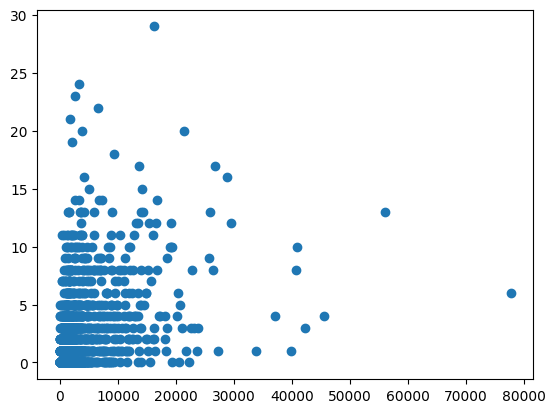

In [ ]:
# Nuage de points pi vs. acc and show the line of best fit
plt.scatter(df["pi"], df["acc"])

In [17]:
import utils


df = utils.load_data()
df = utils.prepare_data(df)

df.corrwith(df["acc"]).sort_values()

ln_distdt                                           -0.149860
distdt                                              -0.133782
borough_Saint-Laurent                               -0.108398
all_pedest                                          -0.101270
lt_restric                                          -0.077015
half_phase                                          -0.076636
curb_exten                                          -0.075525
lt_protect                                          -0.072504
new_half_r                                          -0.068262
borough_Pointe-aux-Trembles-RiviÞres-des-Prairies   -0.067185
lt_prot_re                                          -0.062789
borough_Ahuntsic-Cartierville                       -0.061810
borough_Sud-Ouest                                   -0.059902
borough_Outremont                                   -0.054999
all_red_an                                          -0.046189
borough_MontrÚal-Est                                -0.043322
parking 